# Value at Risk and Expected Shortfall for Portfolio

Calculation of Value at Risk and Expected Shortfall for a portfolio of stocks held by my family.

Portfolio consists of Indian stocks.

I have manually extracted the list of stocks from the broker generated csv report of current holdings as of 22nd December 2023.

Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

initializing time window of 10 years

initializing stock data variables

In [5]:
end_date = dt.date.today()
start_date = end_date - dt.timedelta (3652)

stock_data = pd.read_csv(r"C:\Users\dhvanilzaveri\MBZPMSECTickers.csv")
stock_tickers = list(stock_data['Ticker'])
stock_qty = list(stock_data['Quantity'])

Defining a function to get stock data

In [6]:
def get_stockData(stocks, start, end):
    stockData = yf.download(stocks,start=start,end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    mean_Returns = returns.mean()
    cov_Matrix = returns.cov()
    return stockData,returns,mean_Returns,cov_Matrix


Function to measure portfolio performance

In [7]:
def pf_performance(weights, mean_returns):
    pf_returns = np.sum(mean_returns*weights)
    return pf_returns

Calling functions to get stock data for tickers and cleaning data

In [8]:
close_prices, returns, mean_returns, cov_matrix = get_stockData(stock_tickers,start_date, end_date)
close_prices = close_prices.dropna()
returns = returns.dropna()

[*********************100%***********************]  91 of 91 completed


Calculating portfolio metrics - valuation and returns.
Assuming fixed allocation over the whole period

In [9]:
close_prices['portfolio'] = close_prices.dot(stock_qty)
returns['portfolio'] = close_prices['portfolio'].pct_change()

Historical Value at Risk calculation

In [10]:
def historical_VAR(returns, alpha=5):
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historical_VAR,alpha=5)
    else :
        raise TypeError("Expected returns to be DataFrame or Series")

Historical Expected Shortfall calculation

In [11]:
def historical_ES(returns, alpha = 5):
    if isinstance(returns, pd.Series):
        belowVAR = returns <= historical_VAR(returns, alpha = alpha)
        return returns[belowVAR].mean
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historical_ES,alpha=5)
    else :
        raise TypeError("Expected returns to be DataFrame or series")

nan
<bound method NDFrame._add_numeric_operations.<locals>.mean of Series([], Name: portfolio, dtype: float64)>


(array([ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
         1.,  5.,  2.,  4.,  8.,  5.,  8., 12.,  7.,  8.,  8.,  7.,  8.,
         7.,  1.,  0.,  1.]),
 array([-0.03462474, -0.03280875, -0.03099276, -0.02917677, -0.02736078,
        -0.02554479, -0.02372879, -0.0219128 , -0.02009681, -0.01828082,
        -0.01646483, -0.01464884, -0.01283285, -0.01101686, -0.00920087,
        -0.00738488, -0.00556889, -0.0037529 , -0.0019369 , -0.00012091,
         0.00169508,  0.00351107,  0.00532706,  0.00714305,  0.00895904,
         0.01077503,  0.01259102,  0.01440701,  0.016223  ,  0.01803899,
         0.01985499]),
 <BarContainer object of 30 artists>)

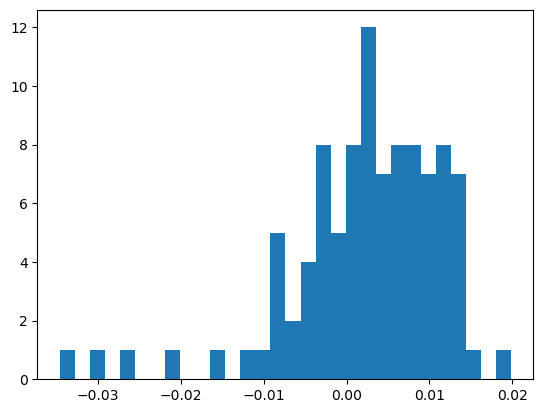

In [12]:
VAR_pf = (historical_VAR(returns, alpha=5))        
ES_pf = historical_ES(returns,alpha=5)

print(VAR_pf['portfolio'])
print(ES_pf['portfolio'])
plt.hist(returns['portfolio'], bins = 30)